# PANCREATIC CANCER GENE EXPRESSION ANALYSIS

BY COLETTE TROUILLOT, KHANG DUONG, SARA CHUNG

In [2]:
#import modules for handling data
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted
import math
import functions
import scipy.stats as stats

import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes

#import machine learning models and tools 
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

In [3]:
# Dataset 1 (Training): "GSE15471"
# Dataset 2 (Testing): "GSE16515"
# Dataset 3 (testing): "GSE22780"

#### DOWNLOAD DATASETS

In [4]:
gsedata1 = functions.get_gsedata("GSE15471", 1)

gsedata2 = functions.get_gsedata("GSE16515", 0)

gsedata3 = functions.get_gsedata("GSE22780", 3)

07-Jun-2022 14:40:26 DEBUG utils - Directory C:/Users/ctrou/AppData/Local/Temp/bmes already exists. Skipping.
07-Jun-2022 14:40:26 INFO GEOparse - File already exist: using local version.
07-Jun-2022 14:40:26 INFO GEOparse - Parsing C:/Users/ctrou/AppData/Local/Temp/bmes\GSE15471_family.soft.gz: 
07-Jun-2022 14:40:26 DEBUG GEOparse - DATABASE: GeoMiame
07-Jun-2022 14:40:26 DEBUG GEOparse - SERIES: GSE15471
07-Jun-2022 14:40:26 DEBUG GEOparse - PLATFORM: GPL570
C:\Users\ctrou\anaconda3\lib\site-packages\GEOparse\GEOparse.py:113: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath, open_kwargs=open_kwargs)
07-Jun-2022 14:40:29 DEBUG GEOparse - SAMPLE: GSM388076
07-Jun-2022 14:40:30 DEBUG GEOparse - SAMPLE: GSM388077
07-Jun-2022 14:40:30 DEBUG GEOparse - SAMPLE: GSM388078
07-Jun-2022 14:40:30 DEBUG GEOparse - SAMPLE: GSM388079
07-Jun-2022 14:40:30 DEBUG GEOparse - SAMPLE: GSM388080
07-Jun-2022 14:40:31 DEBUG GEOpar

07-Jun-2022 14:41:13 DEBUG GEOparse - SAMPLE: GSM414968
07-Jun-2022 14:41:13 DEBUG GEOparse - SAMPLE: GSM414969
07-Jun-2022 14:41:13 DEBUG GEOparse - SAMPLE: GSM414970
07-Jun-2022 14:41:13 DEBUG GEOparse - SAMPLE: GSM414971
07-Jun-2022 14:41:14 DEBUG GEOparse - SAMPLE: GSM414972
07-Jun-2022 14:41:14 DEBUG GEOparse - SAMPLE: GSM414973
07-Jun-2022 14:41:14 DEBUG GEOparse - SAMPLE: GSM414974
07-Jun-2022 14:41:14 DEBUG GEOparse - SAMPLE: GSM414975
07-Jun-2022 14:41:19 DEBUG utils - Directory C:/Users/ctrou/AppData/Local/Temp/bmes already exists. Skipping.
07-Jun-2022 14:41:19 INFO GEOparse - File already exist: using local version.
07-Jun-2022 14:41:19 INFO GEOparse - Parsing C:/Users/ctrou/AppData/Local/Temp/bmes\GSE22780_family.soft.gz: 
07-Jun-2022 14:41:19 DEBUG GEOparse - DATABASE: GeoMiame
07-Jun-2022 14:41:19 DEBUG GEOparse - SERIES: GSE22780
07-Jun-2022 14:41:19 DEBUG GEOparse - PLATFORM: GPL570
C:\Users\ctrou\anaconda3\lib\site-packages\GEOparse\GEOparse.py:113: DtypeWarning: Colu

#### DIFFERENTIAL GENE EXPRESSION ANALYSIS

In [5]:
#CHANGE THESE VALUES FOR DIFFERENTIAL GENE EXPRESSION ANALYSIS
fc_threshold = 1.5
pval_threshold = 0.02


sig_genes1 = functions.get_sig_genes(gsedata1, fc_threshold, pval_threshold)
sig_genes2 = functions.get_sig_genes(gsedata2, fc_threshold, pval_threshold)
sig_genes3 = functions.get_sig_genes(gsedata3, fc_threshold, pval_threshold)

#UNCOMMENT BELOW IF YOU WANT TO GENERATE A CSV FILE WITH THE SIGNIFICANT GENES

#sig_genes1.to_csv('sig_genes1.csv', index = True)
#sig_genes2.to_csv('sig_genes2.csv', index = True)
#sig_genes3.to_csv('sig_genes3.csv', index = True)

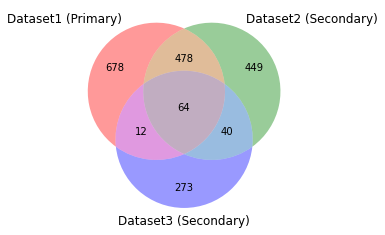

In [6]:
#generate venn diagram
venn3_unweighted([set(sig_genes1.index), set(sig_genes2.index), set(sig_genes3.index)], ('Dataset1 (Primary)', 'Dataset2 (Secondary)', 'Dataset3 (Secondary)'))

plt.show()

In [7]:
#get the common significant genes across all three datasets
sig_genes_all3 = np.intersect1d(np.intersect1d(sig_genes1.index, sig_genes2.index),  sig_genes3.index)

#UNCOMMENT BELOW IF YOU WANT TO GENERATE A CSV FILE WITH THE SIGNIFICANT GENES
#this file is used in David Functional Annotation
#pd.DataFrame(sig_genes_all3).to_csv('sig_genes_all3.csv', index = False, header = False)

['244612_at' 'ACAT1' 'AHNAK2' 'AK4 /// LOC100507855' 'ANTXR2' 'ARNTL2'
 'CAMK2N1' 'CD55' 'CEACAM1' 'CEACAM5' 'CLDN18' 'COL12A1' 'CRIP1'
 'CTA-445C9.15' 'CTNND2' 'CTSE' 'CXCL14' 'DIO2' 'EFNB2' 'EPHA4' 'ERO1LB'
 'GCAT' 'GLS2' 'GPR110' 'GPRC5A' 'GUCA1C' 'HEPH' 'HOXC6' 'IGFBP3' 'KCNJ16'
 'KCNJ5' 'KCNK1' 'KLK10' 'KRT19' 'LAMB3' 'LAMC2' 'LPAR3' 'MALL' 'MCOLN3'
 'MMP28' 'MSLN' 'MTMR11' 'NHS' 'NMU' 'NQO1' 'NT5E' 'PDLIM7' 'PHLDA2'
 'PM20D1' 'S100A6' 'S100P' 'SDR16C5' 'SEL1L' 'SERPINB5' 'SFN' 'SLC16A1'
 'SLC1A2' 'SLC22A3' 'SLC6A14' 'STYK1' 'TEX11' 'TMEM45B' 'TNFAIP2' 'TSPAN1']


#### PRE-PROCESSING DATA FOR MACHINE LEARNING

In [8]:
#get the genes that are present in all three datasets
common_genes = gsedata3.index.intersection(gsedata1.index.intersection(gsedata2.index))

#use the common genes set all three datasets to have equal # of features
gsedata1_common = gsedata1.loc[common_genes].groupby('Gene Symbols').mean()
gsedata2_common = gsedata2.loc[common_genes].groupby('Gene Symbols').mean()
gsedata3_common = gsedata3.loc[common_genes].groupby('Gene Symbols').mean()

#CHANGE VARIANCE RATIO TO REMOVE GENES WITH LOW VARIANCE [0-1]
variance_threshold = 0.99

#get the final filtered data (x1, x2, x3 and y1, y2, y3) using variance threshold 
x1_df = gsedata1_common.transpose()

variance = np.sort(x1_df.var())[math.floor(variance_threshold * x1_df.shape[1])]


x1 = x1_df.loc[:, x1_df.var() > variance].values
y1 = gsedata1_common.columns.values


x2_df = gsedata2_common.transpose()
x2 = x2_df.loc[:, x1_df.var() > variance].values
y2 = gsedata2_common.columns.values


x3_df = gsedata3_common.transpose()
x3 = x3_df.loc[:, x1_df.var() > variance].values
y3 = gsedata3_common.columns.values

##### DECISION TREE

Dataset 1 Cross-Validation Accuracy:  0.8741666666666668

Dataset 2 Metrics
Accuracy: 0.827
Precision: 0.829
Recall: 0.944


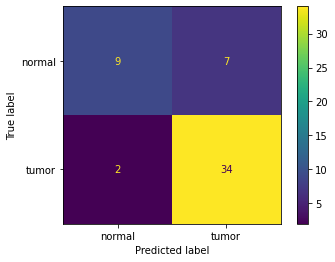

Dataset 3 Metrics
Accuracy: 0.688
Precision: 0.615
Recall: 1.000


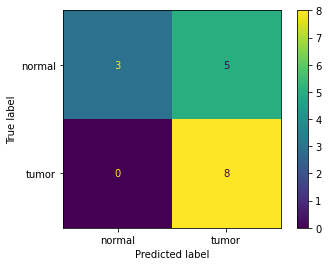

In [9]:
mdlTree = tree.DecisionTreeClassifier(max_depth=1)
mdlTree.fit(x1_df.values, y1);

#get metrics for dataset 1 (primary) -------------------------------------------------------------------------------
print('Dataset 1 Cross-Validation Accuracy: ', (cross_val_score(mdlTree, x1_df.values, y1, cv = 5)).mean())
print()

#get metrics for dataset 2 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlTree, x2_df.values, y2)

print("Dataset 2 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

#get metrics for dataset 3 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlTree, x3_df.values, y3)

print("Dataset 3 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

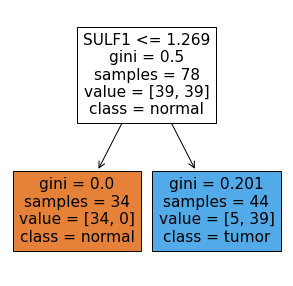

In [10]:
fig = plt.figure(figsize=(5,5))
tree.plot_tree(mdlTree, 
                   feature_names=x1_df.columns,  
                   class_names=np.unique(y1),
                   filled=True);

#### FEATURE SELECTION

In [11]:
mdlKNN = KNeighborsClassifier(n_neighbors=3)


sfs = SequentialFeatureSelector(mdlKNN, n_features_to_select=20, direction='forward', cv=5, scoring = 'accuracy')

sfs.fit(x1,y1)

x1_selected = sfs.transform(x1)
x2_selected = sfs.transform(x2)
x3_selected = sfs.transform(x3)

##### SUPPORT VECTOR MACHINE (BEFORE FEATURE SELECTION)

Support Vector Machine (All Features)
Dataset 1 Cross-Validation Accuracy:  0.8474999999999999

Dataset 2 Metrics
Accuracy: 0.788
Precision: 0.766
Recall: 1.000


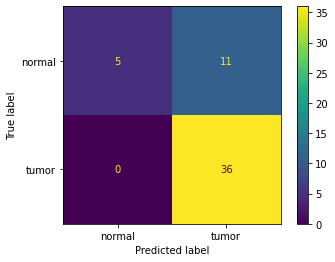

Dataset 3 Metrics
Accuracy: 0.750
Precision: 0.667
Recall: 1.000


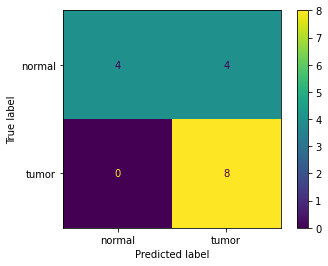

In [12]:
##CROSS VALIDATION FOR SUPPORT VECTOR MACHINE
mdlSVM = SVC(kernel='rbf')
mdlSVM.fit(x1_df.values, y1);

print('Support Vector Machine (All Features)')
#get metrics for dataset 1 (primary) -------------------------------------------------------------------------------
print('Dataset 1 Cross-Validation Accuracy: ', (cross_val_score(mdlSVM, x1_df.values, y1, cv = 5)).mean())
print()

#get metrics for dataset 2 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlSVM, x2_df.values, y2)

print("Dataset 2 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

#get metrics for dataset 3 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlSVM, x3_df.values, y3)

print("Dataset 3 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

#### SUPPORT VECTOR MACHINE (AFTER FEATURE SELECTION)

Support Vector Machine (20 Features)
Dataset 1 Cross-Validation Accuracy:  0.9241666666666667

Dataset 2 Metrics
Accuracy: 0.846
Precision: 0.818
Recall: 1.000


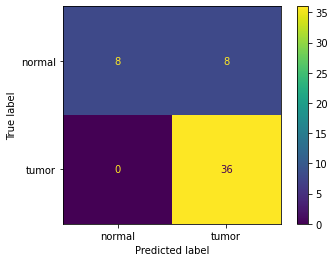

Dataset 3 Metrics
Accuracy: 0.688
Precision: 0.636
Recall: 0.875


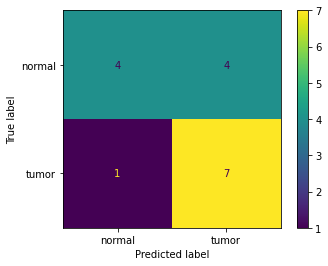

In [13]:
##CROSS VALIDATION FOR SUPPORT VECTOR MACHINE
mdlSVM = SVC(kernel='rbf')
mdlSVM.fit(x1_selected, y1);

print('Support Vector Machine (20 Features)')
#get metrics for dataset 1 (primary) -------------------------------------------------------------------------------
print('Dataset 1 Cross-Validation Accuracy: ', (cross_val_score(mdlSVM, x1_selected, y1, cv = 5)).mean())
print()

#get metrics for dataset 2 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlSVM, x2_selected, y2)

print("Dataset 2 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

#get metrics for dataset 3 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlSVM, x3_selected, y3)

print("Dataset 3 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

##### K-NEAREST NEIGHBOR (BEFORE FEATURE SELECTION)

K-Nearest Neighbor (All Features)
Dataset 1 Cross-Validation Accuracy:  0.9116666666666667

Dataset 2 Metrics
Accuracy: 0.788
Precision: 0.766
Recall: 1.000


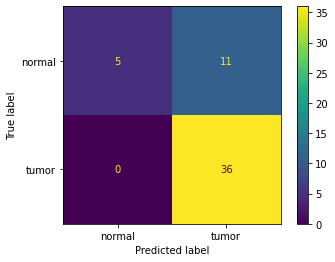

Dataset 3 Metrics
Accuracy: 0.625
Precision: 0.583
Recall: 0.875


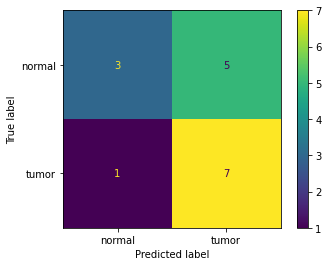

In [14]:
mdlKNN = KNeighborsClassifier(n_neighbors=3)
mdlKNN.fit(x1_df.values, y1)

print('K-Nearest Neighbor (All Features)')
#get metrics for dataset 1 (primary) -------------------------------------------------------------------------------
print('Dataset 1 Cross-Validation Accuracy: ', (cross_val_score(mdlKNN, x1_df.values, y1, cv = 5)).mean())
print()

#get metrics for dataset 2 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlKNN, x2_df.values, y2)

print("Dataset 2 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

#get metrics for dataset 3 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlKNN, x3_df.values, y3)

print("Dataset 3 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

##### K-NEAREST NEIGHBOR (AFTER FEATURE SELECTION)

K-Nearest Neighbor (20 Features)
Dataset 1 Cross-Validation Accuracy:  0.9616666666666667

Dataset 2 Metrics
Accuracy: 0.865
Precision: 0.837
Recall: 1.000


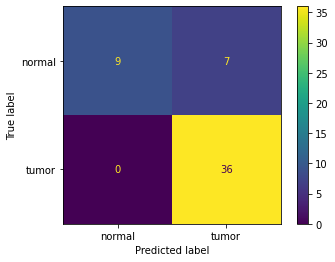

Dataset 3 Metrics
Accuracy: 0.688
Precision: 0.636
Recall: 0.875


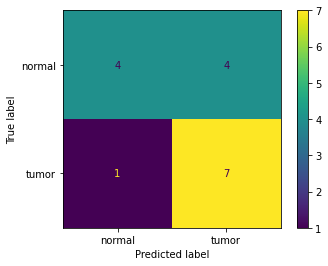

In [15]:
mdlKNN = KNeighborsClassifier(n_neighbors=3)
mdlKNN.fit(x1_selected, y1)

print('K-Nearest Neighbor (20 Features)')
#get metrics for dataset 1 (primary) -------------------------------------------------------------------------------
print('Dataset 1 Cross-Validation Accuracy: ', (cross_val_score(mdlKNN, x1_selected, y1, cv = 5)).mean())
print()

#get metrics for dataset 2 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlKNN, x2_selected, y2)

print("Dataset 2 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

#get metrics for dataset 3 (secondary) --------------------------------------------------------------------------------
accuracy, precision, recall, disp = functions.get_metrics(mdlKNN, x3_selected, y3)

print("Dataset 3 Metrics")
print("Accuracy: %.3f" % (accuracy))
print("Precision: %.3f" % (precision))
print("Recall: %.3f" % (recall))

disp.plot()
plt.show()

#### PRINCIPAL COMPONENT ANALYSIS

In [16]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x2)


principalComponentsDf = pd.DataFrame(principalComponents, columns = ['PC 1', 'PC 2'])

explained_variance = pca.explained_variance_ratio_


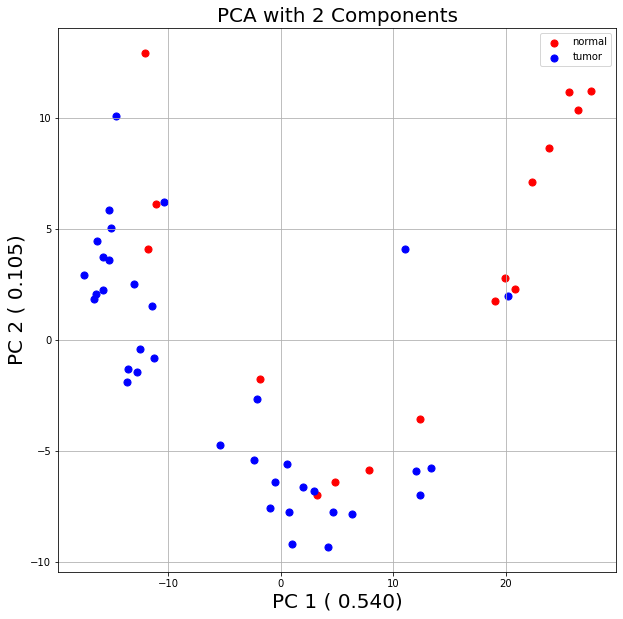

In [17]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'PC 1 ({explained_variance[0]: .3f})', fontsize = 20)
ax.set_ylabel(f'PC 2 ({explained_variance[1]: .3f})', fontsize = 20)
ax.set_title('PCA with 2 Components', fontsize = 20)
groups = np.unique(y2)
colors = ['r', 'b']

for group, color in zip(groups,colors):
  
    ax.scatter(principalComponentsDf.loc[y2 == group, 'PC 1']
               , principalComponentsDf.loc[y2 == group, 'PC 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()